# Day 3 Machine Learning in Python - exercises with answers

## Exercise 1

#### Task 1 
##### Import the required packages to perform K-nearest neighbours.

#### Result:


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# New today - we will introduce it when we use it.
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics


#### Task 2 
##### Set `main_dir` to the location of your project folder.
##### Make `data_dir` from the `main_dir` and concatenate remainder of the path to data directory.

#### Result:

In [2]:
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/aashika/Desktop/skillsoft-machine-learning-2021
/Users/aashika/Desktop/skillsoft-machine-learning-2021/data


#### Task 3
##### Load the cleaned dataset  `ex_cleaned_knn.csv` dataset that we saved in our previous module 
##### Save it as `chicago_cleaned`.

#### Result:

In [3]:
chicago_cleaned = pd.read_csv(data_dir+"/ex_cleaned_knn.csv")

# Look at the first five rows using .head().
chicago_cleaned.head()

percent_house_crowded  percent_house_below_poverty  percent_16_unemployed  \
0                    7.7                         23.6                    8.7   
1                    7.8                         17.2                    8.8   
2                    3.8                         24.0                    8.9   
3                    3.4                         10.9                    8.2   
4                    0.3                          7.5                    5.2   

   percent_25_without_diploma  percent_dependent  per_capita_income  \
0                        18.2               27.5              23939   
1                        20.8               38.5              23040   
2                        11.8               22.2              35787   
3                        13.4               25.5              37524   
4                         4.5               26.2              57123   

   hardship_index  income  
0            39.0   False  
1            46.0   False  
2            20.0    True  
3            17.0    True  
4             6.0    True

#### Task 4
###### Once you ensure that all variables are numeric and that the target variable is Boolean, scale the variables using `scale()`.
###### When using `scale()`, remember that you first have to split your predictors from your target.
###### Label your scaled data `ex_X_scaled` (predictors) and `ex_y` (target).
###### Display the first five records in `ex_X_scaled.`

#### Result:

In [4]:
# Split the data into X and y - y is categorical, so it can't scale.
ex_X = chicago_cleaned.drop('income', axis = 1)
ex_y = np.array(chicago_cleaned['income'])

# Scale X.
ex_X_scaled = scale(ex_X)
print(ex_X_scaled[0:5])

[[ 0.76455091  0.16341619 -0.89126115 -0.18256997 -1.13545603 -0.10981094
  -0.37098756]
 [ 0.79205781 -0.39879857 -0.87784062  0.04020494  0.38438995 -0.16935257
  -0.12381538]
 [-0.3082184   0.19855461 -0.86442008 -0.73093897 -1.86774546  0.6748935
  -1.04188347]
 [-0.41824602 -0.95222873 -0.95836383 -0.59384672 -1.41179167  0.78993668
  -1.1478144 ]
 [-1.27096009 -1.25090533 -1.36097987 -1.35642237 -1.3150742   2.08799731
  -1.53622783]]


#### Task 5
###### Split the scaled data into train and test, use a 70 train - 30 test split. 
###### Name your train `ex_X_train` and `ex_y_train` and your test as `ex_X_test` and `ex_y_test`.
###### Don't forget to set the seed as `np.random.seed(2)`.



#### Result:

In [5]:
# Set the seed.
np.random.seed(2)

# Split into train and test data.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X_scaled, 
                                                                ex_y, 
                                                                test_size = 0.3) 

#### Task 6
###### Now, for cross-validation, use a CV of 5 on the `ex_knn` model.
###### Save the scores as `ex_cv_scores` and print.
###### Find the mean of the 5 cv scores, store this as `ex_mean_cv`.

#### Result:

In [6]:
# Train model with CV of 5.
ex_knn = KNeighborsClassifier(n_neighbors = 5)
ex_cv_scores = cross_val_score(ex_knn, ex_X_scaled, ex_y, cv = 5)

In [7]:
# Average the accuracy scores of all 5 iterations.
ex_mean = np.mean(ex_cv_scores)
ex_mean

0.8333333333333334

## Exercise 2

#### Task 1
###### Create a parameter grid so that we can optimize our parameters for the model.
###### `ex_k_range` should be a list with k values ranging from 1-31.
###### `ex_param_grid` should be a dictionary that consists of key = parameter name i.e `n_neighbors` and values = list of k values that should be searched, for that parameter i.e `ex_k_range`.
###### Instantiate the grid using the original model `ex_knn`. Use `GridSearchCV` with a 10 fold cv and scoring = accuracy.

#### Result:

In [8]:
# Define the parameter values that should be searched.
ex_k_range = list(range(1, 31))

# Create a parameter grid.
ex_param_grid = dict(n_neighbors = ex_k_range)
print(ex_param_grid)

# Instantiate the grid using our original model - knn with k = 5.
ex_grid = GridSearchCV(ex_knn, ex_param_grid, cv = 10, scoring = 'accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


#### Task 2
###### Fit the grid with data. View the complete results.
###### Create a list of the mean scores, using `ex_grid.cv_results_`. Name the list `ex_grid_mean_scores`.


#### Result:

In [9]:
# Fit the grid with data.
ex_grid.fit(ex_X_scaled, ex_y)

# View complete results.
print(ex_grid.cv_results_['mean_test_score'])

[0.85892857 0.89642857 0.85892857 0.89642857 0.85714286 0.85714286
 0.88214286 0.88214286 0.90714286 0.92142857 0.90714286 0.88035714
 0.90714286 0.88035714 0.90714286 0.88214286 0.89464286 0.88214286
 0.89464286 0.88392857 0.90714286 0.89464286 0.90714286 0.90714286
 0.90714286 0.91964286 0.93392857 0.90714286 0.91964286 0.90714286]


In [10]:
# List of the mean scores.
ex_grid_mean_scores = [result for result in ex_grid.cv_results_['mean_test_score']]

#### Task 3
###### Plot your grid search results (grid_mean_scores) so that you can discover optimal `k` visually.
###### What would optimal k be from just looking at this graph?


#### Result:

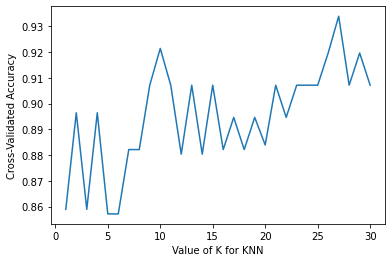

In [11]:
plt.plot(ex_k_range, ex_grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

- Optimal k is hard to define from this graph because of the ups and down. It could be at 3, 10, 27.

#### Task 4
###### Define the best parameters as found through grid search.
###### Define the best score and the dictionary containing the best parameters.
###### Then, print out the best model from the best parameters (`best_estimator_`)

#### Result:

In [12]:
# Single best score achieved across all params (k).
print(ex_grid.best_score_)
ex_grid_score = ex_grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(ex_grid.best_params_)

# Actual model object fit with those best parameters.
# Show default parameters that we did not specify.
print(ex_grid.best_estimator_)

0.9339285714285716
{'n_neighbors': 27}
KNeighborsClassifier(n_neighbors=27)


#### Task 5
###### Add the final, optimized model to the saved pickle file `ex_model_final.sav` that we created in our previous module
###### Pickle the dataframe so that you can add new classification methods to it in the next classes.

#### Result:

In [13]:
ex_model_final = pickle.load(open(data_dir+"/ex_model_final.sav","rb" ))

In [14]:
# Save final grid search model.
ex_model_final = ex_model_final.append({'metrics' : "accuracy" , 
                                        'values' : round(ex_grid_score, 4),
                                        'model':'knn_GridSearchCV' } , 
                                         ignore_index=True)
print(ex_model_final)

    metrics  values             model
0  accuracy  0.8333             knn_5
1  accuracy  0.9339  knn_GridSearchCV


In [15]:
# Pickle `ex_model_final` dataframe.
pickle.dump(ex_model_final, open(data_dir+"/ex_model_final.sav","wb" ))